In [1]:
import sys
sys.path.append('..')

from PIL import Image
from torchvision import transforms as tfs

(480, 270)


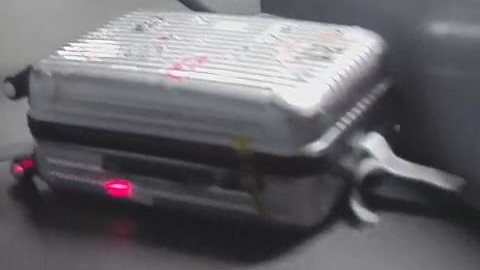

In [5]:
# 读入一张图片
im = Image.open('./image/pCut1/video0/0-001.jpg')
print (im.size)
im

before scale, shape: (480, 270)
after scale, shape: (500, 300)


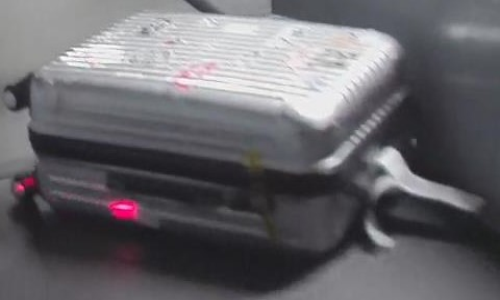

In [26]:
# 比例缩放
print('before scale, shape: {}'.format(im.size))
new_im = tfs.Resize((300, 500))(im)
print('after scale, shape: {}'.format(new_im.size))
new_im

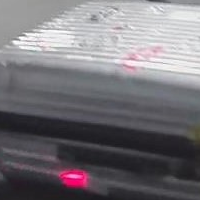

In [12]:
# 随机裁剪出 100 x 100 的区域
random_im1 = tfs.RandomCrop(200)(im)
random_im1


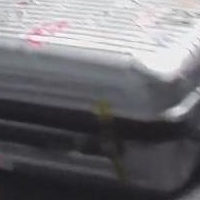

In [13]:
# 中心裁剪出 100 x 100 的区域
center_im = tfs.CenterCrop(200)(im)
center_im

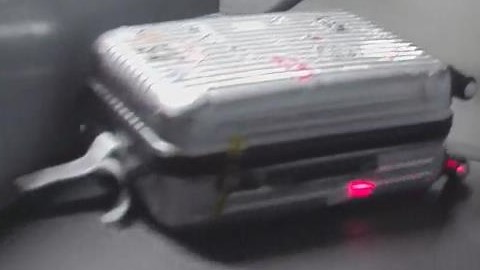

In [15]:
# 随机水平翻转
h_filp = tfs.RandomHorizontalFlip()(im)
h_filp

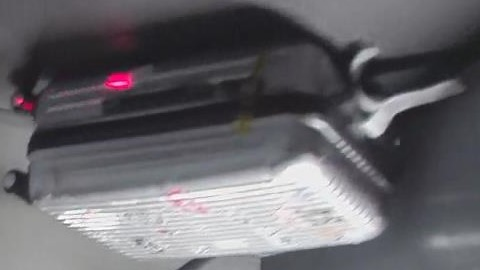

In [18]:
# 随机竖直翻转
v_flip = tfs.RandomVerticalFlip()(im)
v_flip

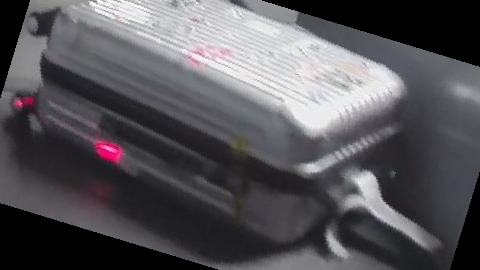

In [19]:
rot_im = tfs.RandomRotation(45)(im)
rot_im

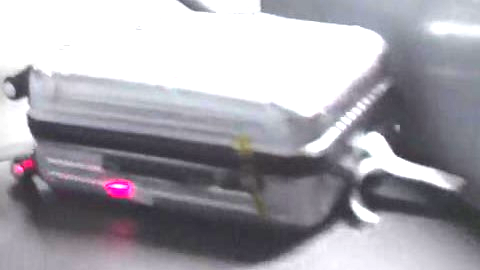

In [21]:
# 亮度
bright_im = tfs.ColorJitter(brightness=1)(im) # 随机从 0 ~ 2 之间亮度变化，1 表示原图
bright_im

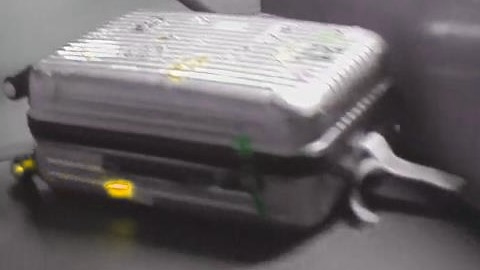

In [22]:
# 颜色
color_im = tfs.ColorJitter(hue=0.5)(im) # 随机从 -0.5 ~ 0.5 之间对颜色变化
color_im

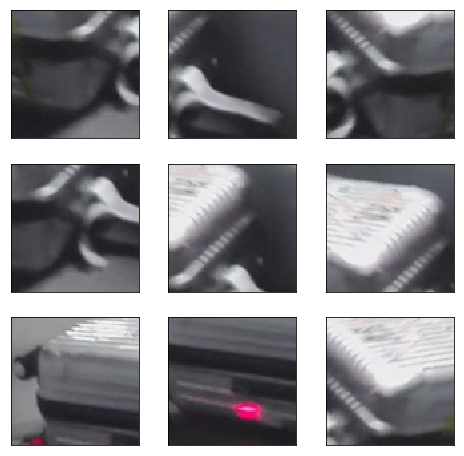

In [24]:
im_aug = tfs.Compose([
    tfs.Resize(200),
    tfs.RandomHorizontalFlip(),
    tfs.RandomCrop(96)
])

im_aug0 = tfs.Compose([
    tfs.Resize((100,100)),
    tfs.ToTensor()
])

im_aug1 = tfs.Compose([
    tfs.Resize(200),
    tfs.RandomHorizontalFlip(),
    tfs.RandomCrop(128),
    tfs.ToTensor()
])

import matplotlib.pyplot as plt
%matplotlib inline
nrows = 3
ncols = 3
figsize = (8, 8)
_, figs = plt.subplots(nrows, ncols, figsize=figsize)
for i in range(nrows):
    for j in range(ncols):
        figs[i][j].imshow(im_aug(im))
        figs[i][j].axes.get_xaxis().set_visible(False)
        figs[i][j].axes.get_yaxis().set_visible(False)
plt.show()
